In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from scipy.stats import mannwhitneyu
import numpy as np
from utils import dimensions_reduction, prepare_dataset, plots, train, test


/tmp/ipykernel_52123/1098832267.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
2024-10-03 18:31:54.958462: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-03 18:31:55.196090: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-03 18:31:55.196186: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin

In [2]:
folder='data_original/MRI'
files = os.listdir(folder)
#read files
features=0
for file in files:
    if file.endswith('.csv'):
        print(file)
        df = pd.read_csv(folder+'/'+file, sep=',')
        #print(df.head())
        #print(df.columns)
        print(df.shape)
        features+=df.shape[1]
print('Total features:',features)   

WM.csv


(4603, 426)
ASEG.csv
(4603, 291)
RHDKT.csv
(4603, 103)
LHA2009.csv
(4603, 232)
LHDKT.csv
(4603, 103)
RHA2009.csv
(4603, 232)
Subjects.csv
(4603, 1)
BRAIN.csv
(4603, 17)
RHAPARC.csv
(4603, 112)
LHAPARC.csv
(4603, 112)
Total features: 1629


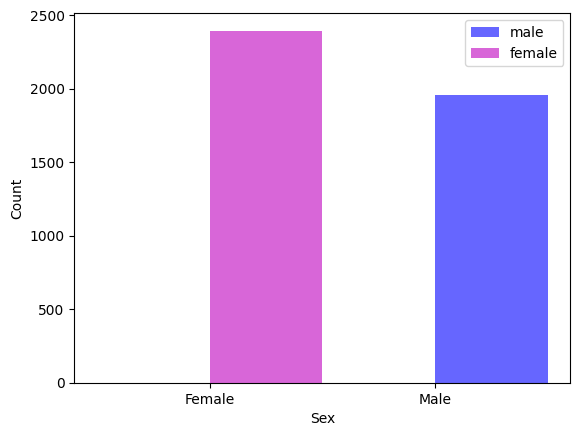

In [45]:
df= pd.read_csv('data/all_norm_confirmed/all_concatenated.csv', sep='\t')
plt.figure()
plt.hist(df[df['male'] == 1]['male'], bins=2, color='b', alpha=0.6, label='male')
plt.hist(df[df['male'] == 0]['male'], bins=2, color='m', alpha=0.6, label='female')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks([0, 1], ['Female', 'Male'])
plt.legend()
plt.savefig('plots/sex_distribution.png')
plt.show()


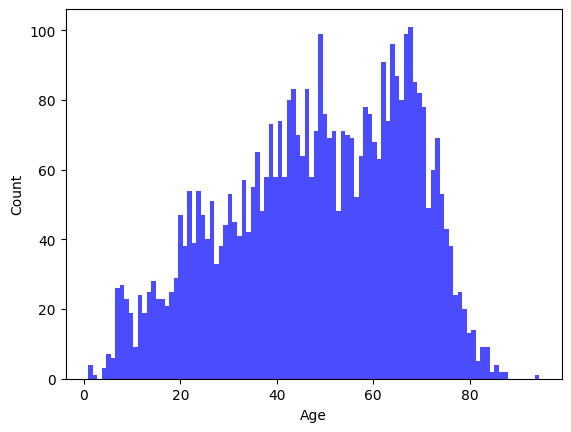

In [46]:
plt.figure()
plt.hist(df['age'], bins=100, color='b', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('plots/age_distribution.png')
plt.show()


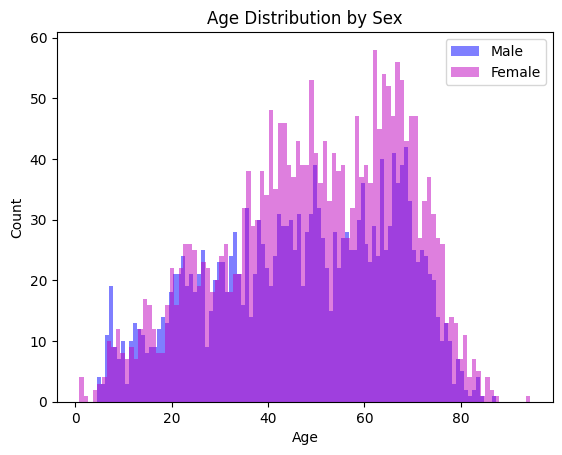

In [47]:
plt.figure()
plt.hist(df[df['male'] == 1]['age'], bins=100, color='b', alpha=0.5, label='Male')
plt.hist(df[df['male'] == 0]['age'], bins=100, color='m', alpha=0.5, label='Female')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution by Sex')
plt.legend()
plt.savefig('plots/age_distribution_by_sex.png')
plt.show()


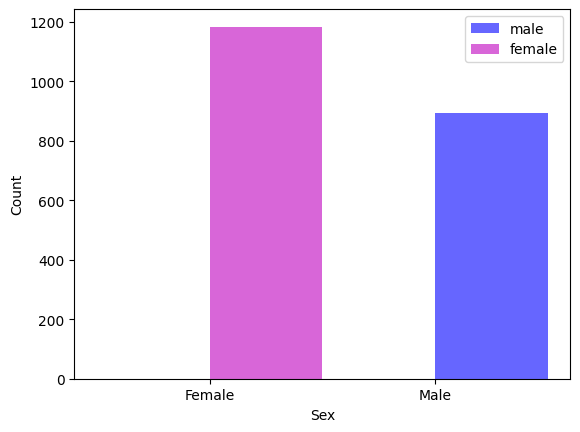

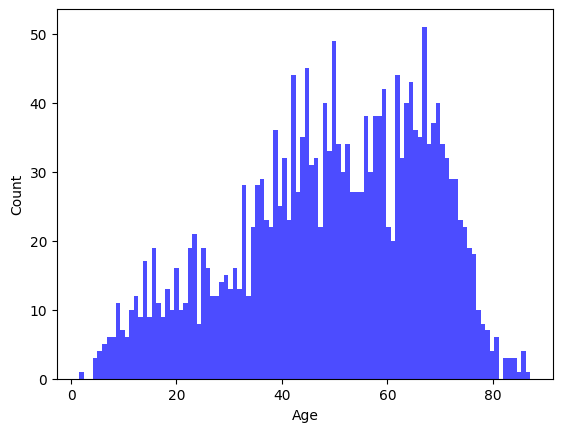

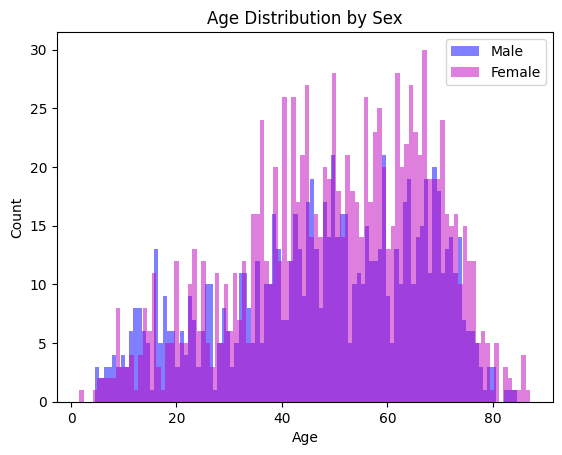

In [3]:
df= pd.read_csv('data/positive_norm_confirmed/all_concatenated.csv', sep='\t')
plt.figure()
plt.hist(df[df['male'] == 1]['male'], bins=2, color='b', alpha=0.6, label='male')
plt.hist(df[df['male'] == 0]['male'], bins=2, color='m', alpha=0.6, label='female')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks([0, 1], ['Female', 'Male'])
plt.legend()
plt.savefig('plots/positive_sex_distribution.png')
plt.show()

plt.figure()
plt.hist(df['age'], bins=100, color='b', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('plots/positive_age_distribution.png')
plt.show()

plt.figure()
plt.hist(df[df['male'] == 1]['age'], bins=100, color='b', alpha=0.5, label='Male')
plt.hist(df[df['male'] == 0]['age'], bins=100, color='m', alpha=0.5, label='Female')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution by Sex')
plt.legend()
plt.savefig('plots/positive_age_distribution_by_sex.png')
plt.show()

In [19]:
folder='data/pathology'
files = os.listdir(folder)
#read files
features=0
for file in files:
    if file.endswith('.csv'):
        print(file)
        df = pd.read_csv(folder+'/'+file, sep='\t')
        #print(df.head())
        #print(df.columns)
        print(df.shape)
        features+=df.shape[1]
print('Total features:',features)   

WM.csv
(215, 426)
ASEG.csv
(215, 286)
RHDKT.csv
(215, 103)
LHA2009.csv
(215, 223)
LHDKT.csv
(215, 96)
RHA2009.csv
(215, 223)
Subjects.csv
(215, 8)
BRAIN.csv
(215, 8)
RHAPARC.csv
(215, 103)
LHAPARC.csv
(215, 103)
Total features: 1579


In [22]:
folder='data/negative_pathology_norm_confirmed_normal'
files = os.listdir(folder)
#read files
features=0
for file in files:
    if file.endswith('.csv'):
        print(file)
        df = pd.read_csv(folder+'/'+file, sep='\t')
        #print(df.head())
        #print(df.columns)
        print(df.shape)
        features+=df.shape[1]
print('Total features:',features)   

WM.csv
(214, 181)
ASEG.csv
(214, 119)
RHDKT.csv
(214, 81)
LHA2009.csv
(214, 135)
LHDKT.csv
(214, 66)
RHA2009.csv
(214, 141)
Subjects.csv
(214, 6)
BRAIN.csv
(214, 5)
RHAPARC.csv
(214, 72)
LHAPARC.csv
(214, 73)
all_concatenated.csv
(214, 879)
Total features: 1758


In [14]:
folder='data/positive_norm_confirmed_normal'
files = os.listdir(folder)
#read files
features=0
for file in files:
    if file.endswith('.csv'):
        print(file)
        df = pd.read_csv(folder+'/'+file, sep='\t')
        #print(df.head())
        #print(df.columns)
        print(df.shape)
        features+=df.shape[1]
print('Total features:',features)   

WM.csv
(2076, 181)
ASEG.csv
(2076, 119)
RHDKT.csv
(2076, 81)
LHA2009.csv
(2076, 135)
LHDKT.csv
(2076, 66)
RHA2009.csv
(2076, 141)
Subjects.csv
(2076, 6)
BRAIN.csv
(2076, 5)
RHAPARC.csv
(2076, 71)
LHAPARC.csv
(2076, 73)
all_concatenated.csv
(2076, 878)
Total features: 1756


In [17]:
folder='data/negative_pathology_norm_confirmed'
files = os.listdir(folder)
#read files
features=0
for file in files:
    if file.endswith('.csv'):
        print(file)
        df = pd.read_csv(folder+'/'+file, sep='\t')
        #print(df.head())
        #print(df.columns)
        print(df.shape)
        features+=df.shape[1]
print('Total features:',features)   

WM.csv
(214, 425)
ASEG.csv
(214, 285)
RHDKT.csv
(214, 102)
LHA2009.csv
(214, 222)
LHDKT.csv
(214, 95)
RHA2009.csv
(214, 222)
Subjects.csv
(214, 8)
BRAIN.csv
(214, 7)
RHAPARC.csv
(214, 102)
LHAPARC.csv
(214, 102)
all_concatenated.csv
(214, 1570)
Total features: 3140


In [7]:
filename='data/positive_norm_confirmed_normal/all_concatenated.csv'
df = pd.read_csv(filename, sep='\t')
print(df.shape)

(2076, 878)


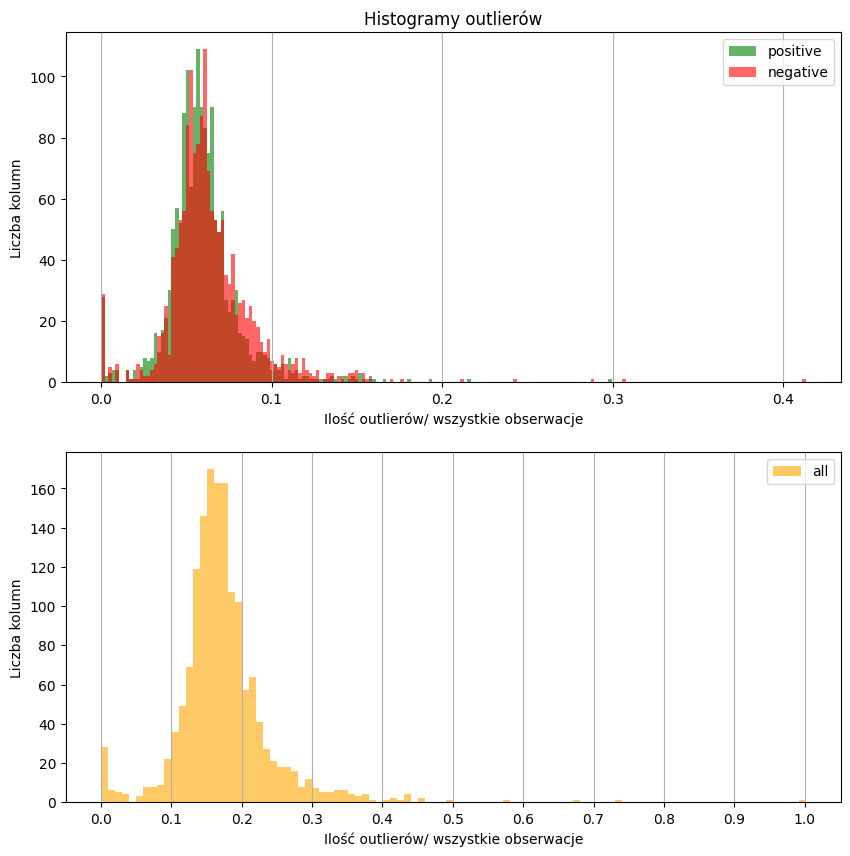

In [2]:
data_type='positive'
filename=f'results/{data_type}_outliers_values.csv'
df_positive = pd.read_csv(filename, sep='\t', index_col=0)
filename=f'results/{data_type}_outliers.csv'
df_positive_outliers = pd.read_csv(filename, sep='\t', index_col=0)
number_of_observations_positive = df_positive_outliers.shape[0]
number_of_columns=df_positive_outliers.shape[1]

data_type='negative'
filename=f'results/{data_type}_outliers_values.csv'
df_negative = pd.read_csv(filename, sep='\t', index_col=0)
filename=f'results/{data_type}_outliers.csv'
df_negative_outliers = pd.read_csv(filename, sep='\t', index_col=0)
number_of_observations_negative = df_negative_outliers.shape[0]

data_type='all'
filename=f'results/{data_type}_outliers_values.csv'
df_all = pd.read_csv(filename, sep='\t', index_col=0)
filename=f'results/{data_type}_outliers.csv'
df_all_outliers = pd.read_csv(filename, sep='\t', index_col=0)
number_of_observations_all = df_all_outliers.shape[0]
#make a histogram from row 'outliers_values'


bins = np.linspace(
    min((df_positive.loc['outliers_number']/number_of_observations_positive).min(), (df_negative.loc['outliers_number']/number_of_observations_negative).min()), 
    max((df_positive.loc['outliers_number']/number_of_observations_positive).max(), (df_negative.loc['outliers_number']/number_of_observations_negative).max()), 
    201  # 10 binów
)
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.hist(df_positive.loc['outliers_number']/number_of_observations_positive, bins=bins, color='g', alpha=0.6, label='positive')
plt.hist(df_negative.loc['outliers_number']/number_of_observations_negative, bins=bins, color='r', alpha=0.6, label='negative')
#plt.hist(df_all.loc['outliers_number']/number_of_observations_all, bins=100, color='orange', alpha=0.6, label='all')
plt.title(f'Histogramy outlierów')
plt.xlabel('Ilość outlierów/ wszystkie obserwacje')
plt.ylabel('Liczba kolumn')
#grid in x axis co 5%, tylko siatka nie podpisy
#plt.gca().xaxis.set_major_formatter(ScalarFormatter(useOffset=False))
#plt.gca().xaxis.set_major_locator(plt.MultipleLocator(0.1))
plt.gca().xaxis.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.hist(df_all.loc['outliers_number']/number_of_columns, bins=100, color='orange', alpha=0.6, label='all')
plt.xlabel('Ilość outlierów/ wszystkie obserwacje')
plt.ylabel('Liczba kolumn')
#grid in x axis co 5%, tylko siatka nie podpisy
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useOffset=False))
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(0.1))
plt.gca().xaxis.grid(True)
plt.legend()
plt.savefig(f'plots/outliers_all.png')


In [48]:
percent_001_positive=0.01*number_of_observations_positive
percent_001_negative=0.01*number_of_observations_negative

percent_012_positive=0.12*number_of_observations_positive
percent_012_negative=0.12*number_of_observations_negative

outliers_001_positive=df_positive.loc['outliers_number'][(df_positive.loc['outliers_number']<=percent_001_positive)==True]
outliers_001_negative=df_negative.loc['outliers_number'][(df_negative.loc['outliers_number']<=percent_001_negative)==True]

outliers_012_positive=df_positive.loc['outliers_number'][(df_positive.loc['outliers_number']>=percent_012_positive)==True]
outliers_012_negative=df_negative.loc['outliers_number'][(df_negative.loc['outliers_number']>=percent_012_negative)==True]

max_length = max(len(outliers_001_positive), len(outliers_001_negative), len(outliers_012_positive), len(outliers_012_negative))

# Wyrównanie długości list, wypełnienie braków wartościami NaN
outliers_001_positive_indices = list(outliers_001_positive.index) + [np.nan] * (max_length - len(outliers_001_positive))
outliers_001_negative_indices = list(outliers_001_negative.index) + [np.nan] * (max_length - len(outliers_001_negative))
outliers_012_positive_indices = list(outliers_012_positive.index) + [np.nan] * (max_length - len(outliers_012_positive))
outliers_012_negative_indices = list(outliers_012_negative.index) + [np.nan] * (max_length - len(outliers_012_negative))
#save to df
df_outliers = pd.DataFrame({
    'outliers_001_positive': outliers_001_positive_indices,
    'outliers_001_negative': outliers_001_negative_indices,
    'outliers_015_positive': outliers_012_positive_indices,
    'outliers_015_negative': outliers_012_negative_indices
})

# Zapis wyników do pliku CSV
df_outliers.to_csv('results/outliers_min_max.csv', sep='\t', index=False)


In [17]:
#mann whitney test
positive=df_positive.loc['outliers_number']/number_of_observations_positive
negative=df_negative.loc['outliers_number']/number_of_observations_negative


stat, p = mannwhitneyu(positive, negative)
print('Statistics=%.3f, p=%.6f' % (stat, p))

Statistics=1078492.000, p=0.000000


In [18]:
p

1.3633700483464835e-07

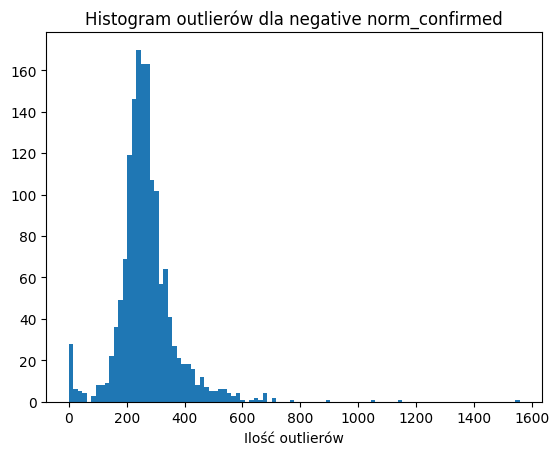

In [6]:
data_type='negative'
filename=f'results/{data_type}_outliers_values.csv'
df = pd.read_csv(filename, sep='\t', index_col=0)

#make a histogram from row 'outliers_values'

plt.hist(df.loc['outliers_number'], bins=100)
plt.title(f'Histogram outlierów dla {data_type} norm_confirmed')
plt.xlabel('Ilość outlierów')
plt.savefig(f'plots/outliers_{data_type}.png')

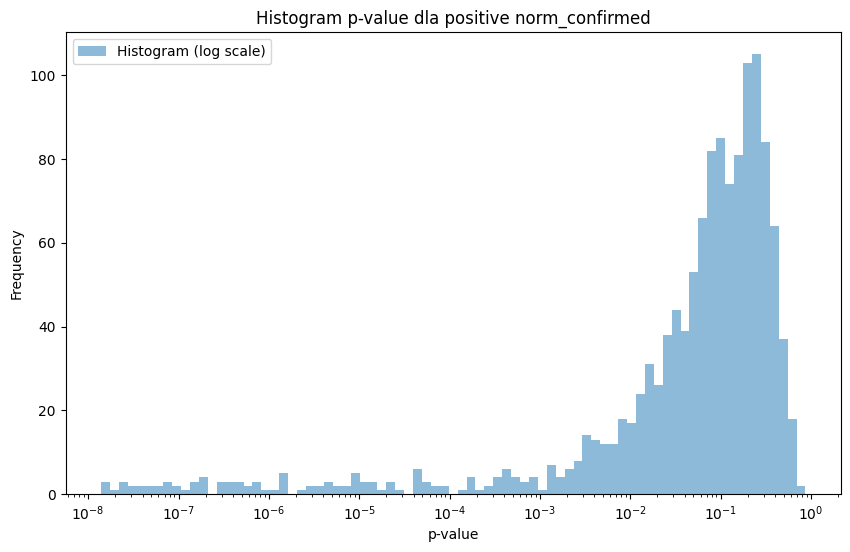

In [93]:
data_type='positive'
filename=f'results/{data_type}_outliers_values.csv'
df = pd.read_csv(filename, sep='\t', index_col=0)

plt.figure(figsize=(10, 6))
#plt.hist(df.loc['p_after'], bins=80, alpha=0.5, label='Histogram')
logbins = np.logspace(np.log10(df.loc['p_after'].min())/8, np.log10(df.loc['p_after'].max()), 80)
plt.hist(df.loc['p_after'], bins=logbins, alpha=0.5, label='Histogram (log scale)')
plt.title(f'Histogram p-value dla {data_type} norm_confirmed')
plt.xscale('log')
plt.xlabel('p-value')
plt.ylabel('Frequency')
plt.legend()
plt.savefig(f'plots/pvalue_{data_type}_log.png')
plt.show()

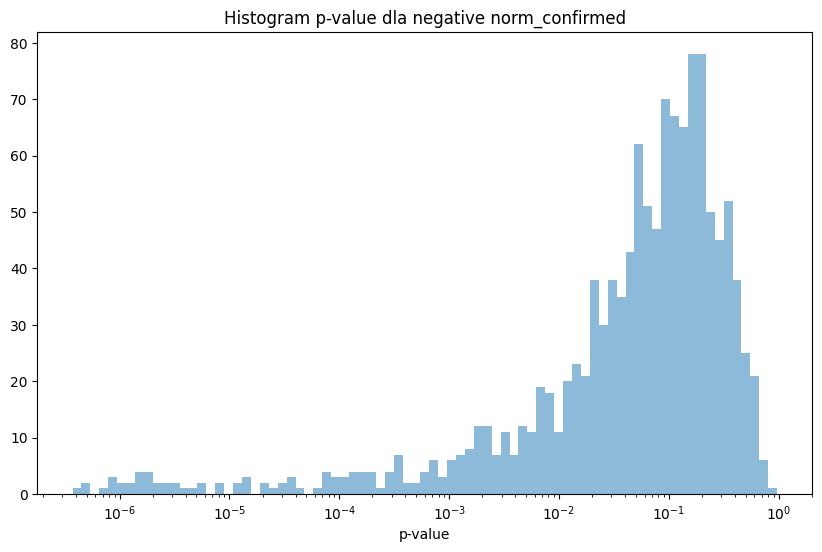

In [102]:
data_type='negative'
filename=f'results/{data_type}_outliers_values.csv'
df = pd.read_csv(filename, sep='\t', index_col=0)

#make a histogram from row 'outliers_values'
plt.figure(figsize=(10, 6))
logbins = np.logspace(np.log10(df.loc['p_after'].min())/8, np.log10(df.loc['p_after'].max()), 80)
plt.hist(df.loc['p_after'], bins=logbins, alpha=0.5, label='Histogram (log scale)')
plt.title(f'Histogram p-value dla {data_type} norm_confirmed')
plt.xscale('log')
#plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=False))
plt.xlabel('p-value')
plt.savefig(f'plots/pvalue_{data_type}_log.png')

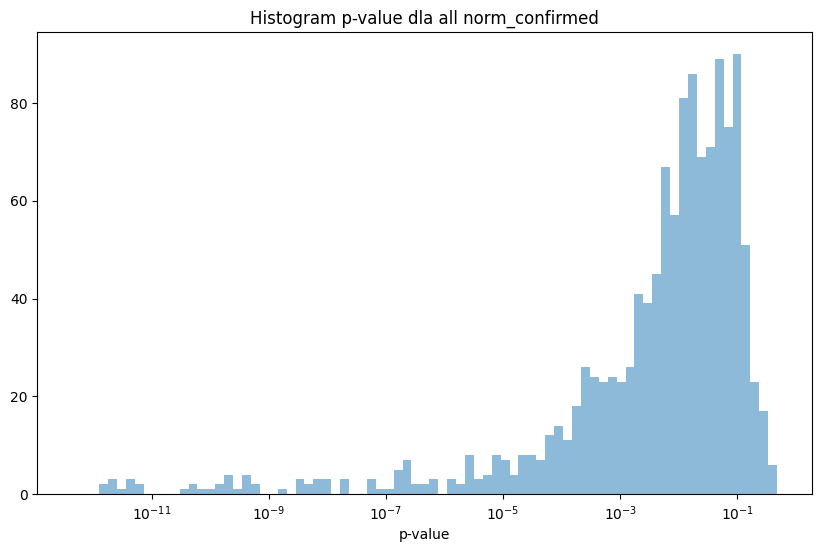

In [101]:
data_type='all'
filename=f'results/{data_type}_outliers_values.csv'
df = pd.read_csv(filename, sep='\t', index_col=0)

plt.figure(figsize=(10, 6))
logbins = np.logspace(np.log10(df.loc['p_after'].min())/8, np.log10(df.loc['p_after'].max()), 80)
plt.hist(df.loc['p_after'], bins=logbins, alpha=0.5, label='Histogram (log scale)')
plt.title(f'Histogram p-value dla {data_type} norm_confirmed')
plt.xscale('log')
#plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=False))
plt.xlabel('p-value')
plt.savefig(f'plots/pvalue_{data_type}_log.png')
plt.show()

DatasetPreprocessor initialized
DimensionsReductor initialized


/tmp/ipykernel_31423/678455521.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  explained_var_first[i].append(df.iloc[nr_of_component][j + nr_of_features+1])


Feature ASEG-wm-rh-entorhinal_Volume_mm3:
Mean: 0.13638586416707588
Feature ASEG-wm-lh-paracentral_normMean:
Mean: 0.13410736626002662
Feature A2009-ctx-rh-G_oc-temp_med-Parahip_GrayVol:
Mean: 0.12963096232793403
Feature ASEG-wm-rh-paracentral_normMean:
Mean: 0.1288293038937986
Feature ASEG-wm-lh-precentral_normMean:
Mean: 0.12363245046077556
Feature DKT-ctx-lh-entorhinal_GrayVol:
Mean: 0.11769692317041654
Feature APARC-ctx-lh-entorhinal_GrayVol:
Mean: 0.1160595716975375
Feature APARC-ctx-rh-entorhinal_GrayVol:
Mean: 0.11494140760509769
Feature DKT-ctx-rh-entorhinal_GrayVol:
Mean: 0.11404098960206095
Feature ASEG-wm-rh-precentral_normMean:
Mean: 0.11002116901535365
Feature ASEG-wm-lh-postcentral_normMean:
Mean: 0.10884096021339215
Feature APARC-ctx-lh-pericalcarine_GrayVol:
Mean: -0.10637745075225215
Feature DKT-ctx-lh-pericalcarine_GrayVol:
Mean: -0.10584547169608063
Feature APARC-ctx-lh-parahippocampal_ThickAvg:
Mean: 0.1025301924053495
Feature DKT-ctx-lh-parahippocampal_ThickAvg:
Me

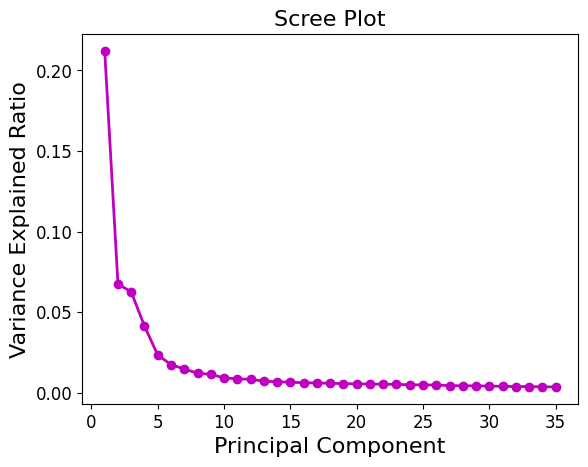

In [47]:
import importlib
importlib.reload(plots)

components_nr=35
preprocessor = prepare_dataset.DatasetPreprocessor()
reductor = dimensions_reduction.DimensionsReductor()
devide_by_total_volume=True
data_type='positive'
nr_of_features=20
df=pd.read_csv(f'data/{data_type}_norm_confirmed_normal/all_concatenated.csv', sep='\t')
df=df.drop(columns=['identifier', 'norm_confirmed', 'sex', 'female', 'male'])
if devide_by_total_volume:
    df=preprocessor.divide_by_total_volume(df)


X_train,_, X_test=preprocessor.standardize_data(df, df, df)
pca_mri, train_pca, _, test_pca, importance_df=reductor.principal_component_analysis(X_train, X_test, components_nr, n_features=nr_of_features)
nr_of_component=10

df = importance_df
explained_var_first = [[] for _ in range(nr_of_features)]

names=[]
for cell in df.iloc[nr_of_component][:nr_of_features]:
    names.append(cell)

for j, cell in enumerate(df.iloc[nr_of_component]):
    for i, name in enumerate(names):
        if type(cell)==str:
            if name in cell:
                explained_var_first[i].append(df.iloc[nr_of_component][j + nr_of_features+1])

# Konwertuj listy na tablice numpy
explained_var_first = [np.array(x) for x in explained_var_first]

# Oblicz średnią i odchylenie standardowe dla każdej cechy
for i, values in enumerate(explained_var_first):
    mean_value = np.mean(values) if len(values) > 0 else np.nan

    print(f"Feature {names[i]}:")
    print(f"Mean: {mean_value}")
explained_variance_ratio=pca_mri.explained_variance_ratio_
formatted_explained_variance = [f"{num:.10f}" for num in explained_variance_ratio]
print('Explained variability per principal component: {}'.format(formatted_explained_variance))
print(len(formatted_explained_variance))
print(train_pca.shape, test_pca.shape)
plt.style.use('default')
plots.scree_plot(pca_mri, type=data_type, dev=devide_by_total_volume)

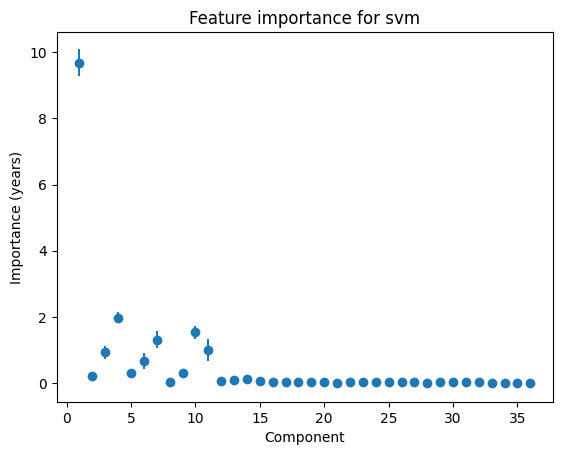

In [3]:
model_name='svm'
filename=f'train_positive_test_None_importance_age_{model_name}_valid_0.csv'
df = pd.read_csv(f'results/{filename}', sep='\t', index_col=0)
#i want to draw feature importance, it is in columns containing 'comp imp'

importances=[]
for column in df.columns:
    if 'comp_imp' in column:
        importances.append(df[column].values)

importances=np.array(importances)
mean_importances=np.mean(importances, axis=0)
std_importances=np.std(importances, axis=0)
plt.figure()
plt.errorbar(range(1,mean_importances.shape[0]+1), mean_importances, yerr=std_importances, fmt='o')
plt.xlabel('Component')
plt.ylabel('Importance (years)')
plt.title(f'Feature importance for {model_name}')
plt.savefig(f'plots/{model_name}_feature_importance.png')
plt.show()

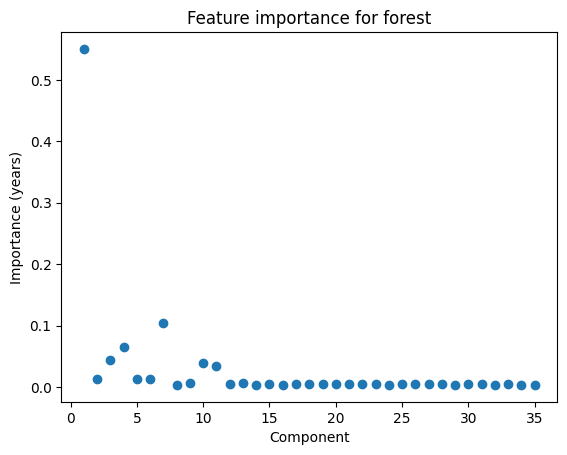

In [5]:
model_name='forest'
filename=f'train_positive_test_None_importance_age_{model_name}_valid_0.csv'
df = pd.read_csv(f'results/{filename}', sep='\t', index_col=0)
#i want to draw feature importance, it is in columns containing 'comp imp'

importances=[]
for column in df.columns:
    if 'comp_imp' in column:
        importances.append(df[column].values)

importances=np.array(importances)
mean_importances=np.mean(importances, axis=0)
std_importances=np.std(importances, axis=0)
plt.figure()
plt.errorbar(range(1,mean_importances.shape[0]+1), mean_importances, yerr=std_importances, fmt='o')
plt.xlabel('Component')
plt.ylabel('Importance (years)')
plt.title(f'Feature importance for {model_name}')
plt.savefig(f'plots/{model_name}_feature_importance.png')
plt.show()

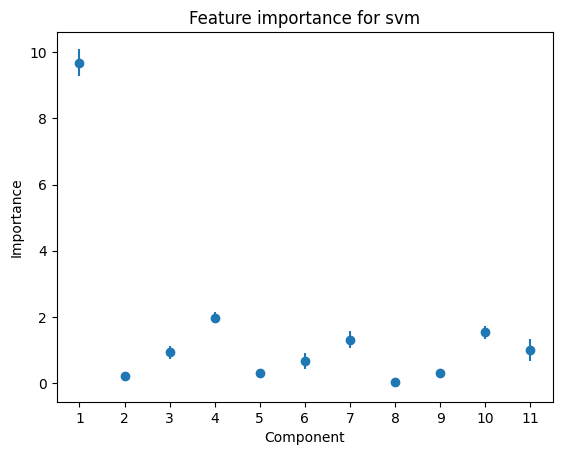

In [4]:
model_name='svm'
filename=f'train_positive_test_None_importance_age_{model_name}_valid_0.csv'
df = pd.read_csv(f'results/{filename}', sep='\t', index_col=0)
#i want to draw feature importance, it is in columns containing 'comp imp'

importances=[]
for column in df.columns:
    if 'comp_imp' in column:
        importances.append(df[column].values)

importances=np.array(importances)
mean_importances=np.mean(importances, axis=0)
std_importances=np.std(importances, axis=0)
plt.figure()
plt.errorbar(range(1,mean_importances.shape[0]+1), mean_importances, yerr=std_importances, fmt='o')
plt.xlabel('Component')
plt.ylabel('Importance')
plt.xlim(0.5, 11.5)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
plt.title(f'Feature importance for {model_name}')
plt.savefig(f'plots/{model_name}_feature_importance_xlim.png')
plt.show()

In [87]:
import re

# Wczytaj dane z pliku
with open('positive_component1.txt', 'r') as file:
    data = file.read()

# Wzorzec do wyodrębnienia cech
pattern = r'Feature (\S+):\s*Mean: ([\-\d\.e]+)\s*Std Dev: ([\-\d\.e]+)'
matches = re.findall(pattern, data)

# Przygotowanie nagłówka tabeli LaTeX
latex_table = r"""
\begin{table}[H]
\caption{Cechy dla komponentu nr 3}
\begin{tabular}{|c|l|l|}
\hline
Comp\_nr & Atribute name                                    & Mean \& Std Dev                       \\ \hline
"""

# Dodaj dane do tabeli LaTeX
for i, match in enumerate(matches, start=1):
    feature_name, mean, std_dev = match
    feature_name = feature_name.replace('_', '\_')
    latex_table += f"3        & {feature_name} & {mean}±{std_dev} \\\\ \hline\n"

# Dodaj stopkę tabeli
latex_table += r"""
\end{tabular}
\end{table}
"""

# Zapisz do pliku .tex
with open('table.tex', 'w') as file:
    file.write(latex_table)

print("Tabela LaTeX została zapisana do pliku 'table.tex'.")


Tabela LaTeX została zapisana do pliku 'table.tex'.


/home/marysia/Documents/GitHub/MRI_machine_learning/utils/plots.py:329: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b--" (-> color='b'). The keyword argument will take precedence.
  ax.plot(unique_actual, unique_actual, "b--", color='m', label='y=x')


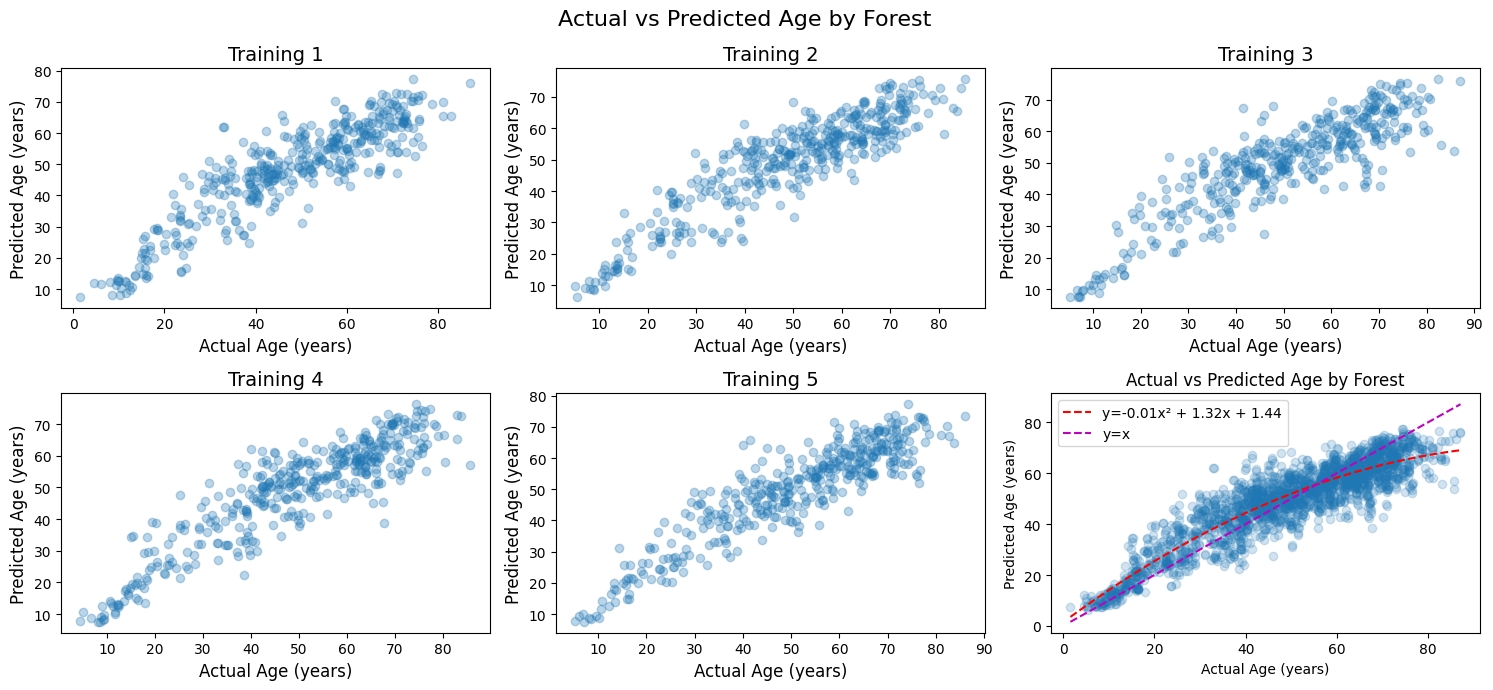

/home/marysia/Documents/GitHub/MRI_machine_learning/utils/plots.py:329: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b--" (-> color='b'). The keyword argument will take precedence.
  ax.plot(unique_actual, unique_actual, "b--", color='m', label='y=x')


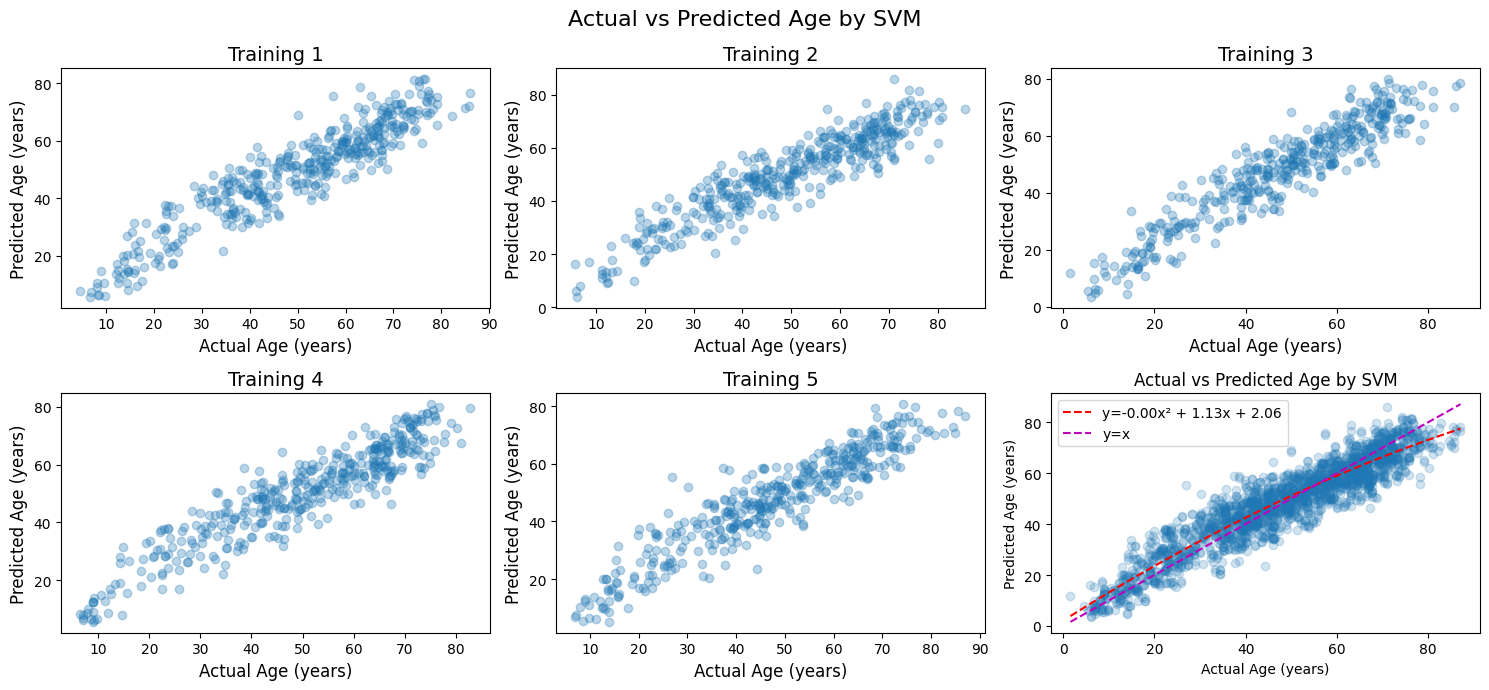

/home/marysia/Documents/GitHub/MRI_machine_learning/utils/plots.py:329: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b--" (-> color='b'). The keyword argument will take precedence.
  ax.plot(unique_actual, unique_actual, "b--", color='m', label='y=x')


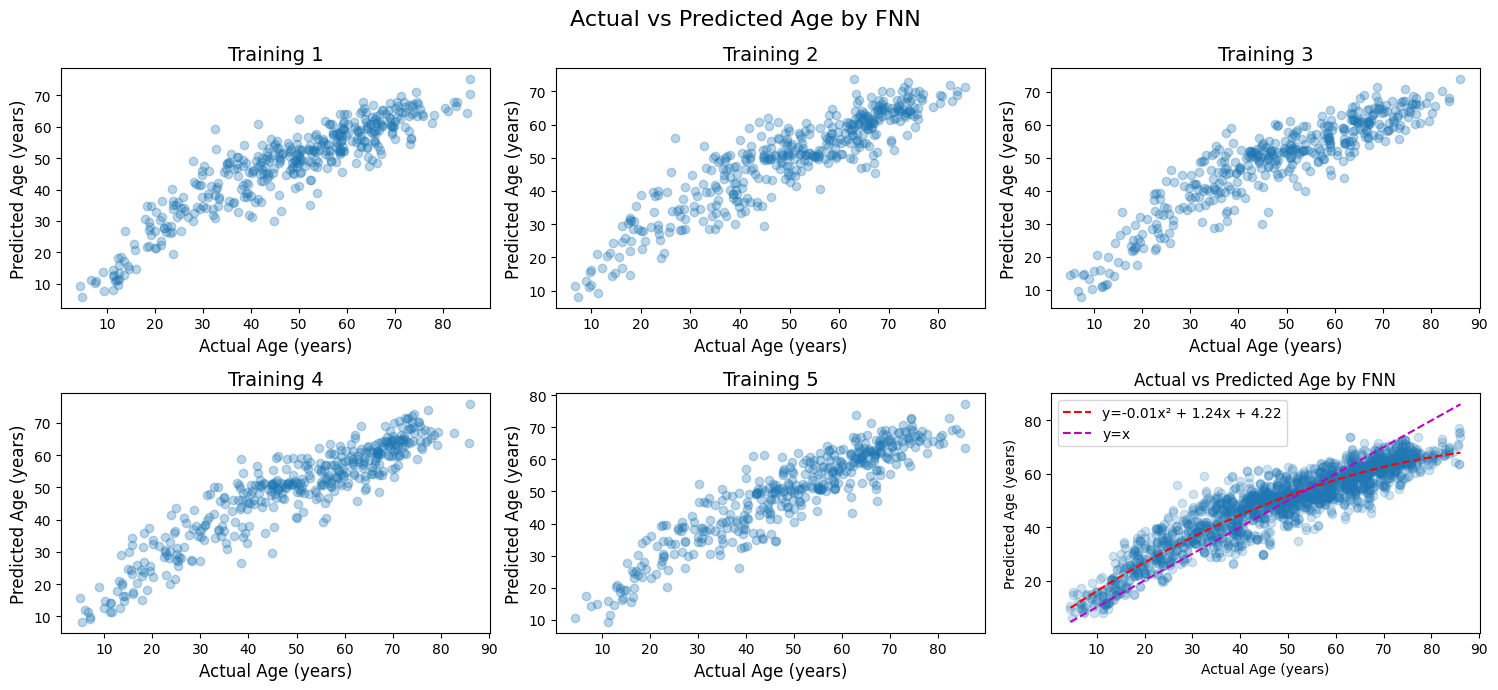

/home/marysia/Documents/GitHub/MRI_machine_learning/utils/plots.py:329: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b--" (-> color='b'). The keyword argument will take precedence.
  ax.plot(unique_actual, unique_actual, "b--", color='m', label='y=x')


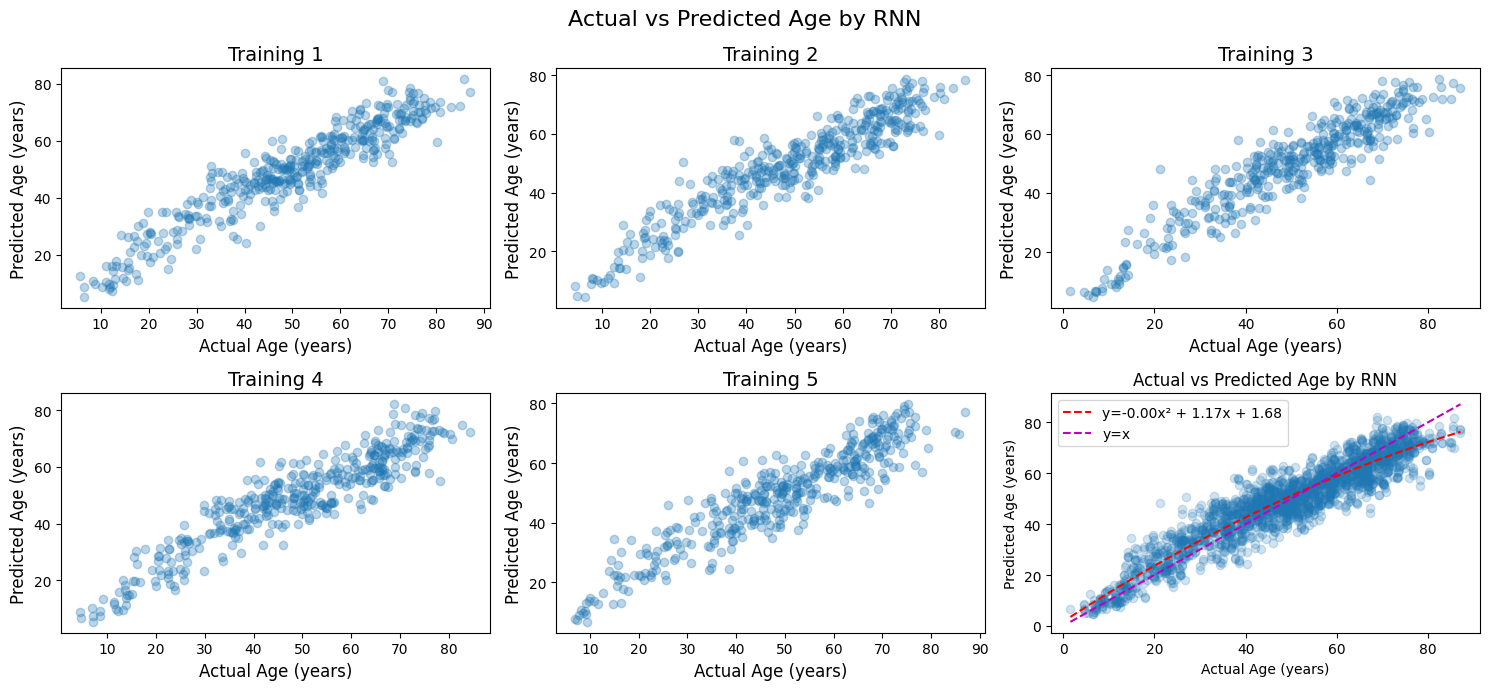

In [31]:
import importlib
importlib.reload(plots)
data_type='positive'
#age prediction results, function alrady saves the results
results_tree=pd.read_csv(f'results/train_{data_type}_test_None_regression_results_forest_valid_0.csv', sep='\t')
plots.age_prediction_function(results_tree, model="Forest", data_type=data_type)

results_svm=pd.read_csv(f'results/train_{data_type}_test_None_regression_results_svm_valid_0.csv', sep='\t')
plots.age_prediction_function(results_svm, model="SVM", data_type=data_type)

results_nn=pd.read_csv(f'results/train_{data_type}_test_None_regression_results_fnn_valid_0.csv', sep='\t')
plots.age_prediction_function(results_nn, model="FNN", data_type=data_type)

results_rnn=pd.read_csv(f'results/train_{data_type}_test_None_regression_results_rnn_valid_0.csv', sep='\t')
plots.age_prediction_function(results_rnn, model="RNN", data_type=data_type)

/home/marysia/Documents/GitHub/MRI_machine_learning/utils/plots.py:329: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b--" (-> color='b'). The keyword argument will take precedence.
  ax.plot(unique_actual, unique_actual, "b--", color='m', label='y=x')


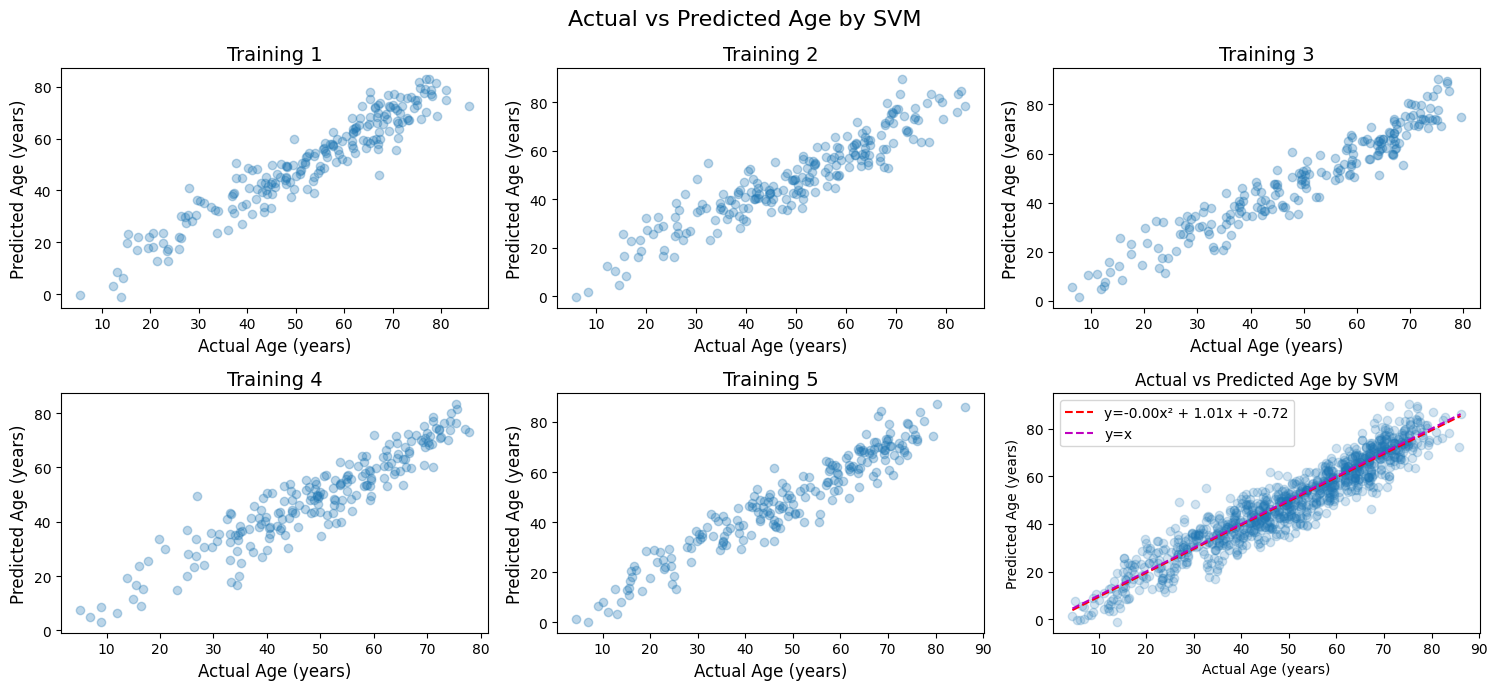

In [30]:
results_svm=pd.read_csv(f'results/train_{data_type}_test_None_regression_results_svm_valid_True.csv', sep='\t')
plots.age_prediction_function(results_svm, model="SVM", data_type=data_type, valid=True)


/home/marysia/Documents/GitHub/MRI_machine_learning/utils/plots.py:325: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b--" (-> color='b'). The keyword argument will take precedence.
  ax.plot(unique_actual, unique_actual, "b--", color='m', label='y=x')


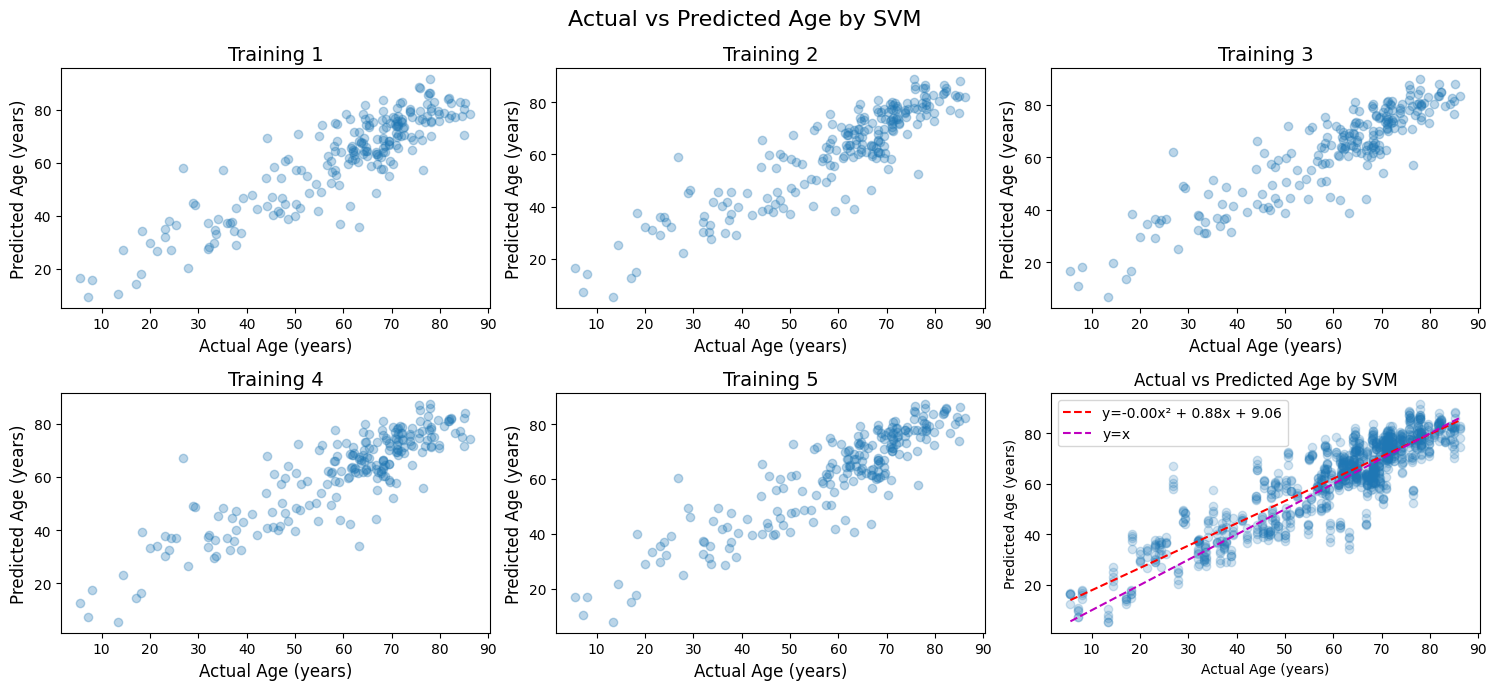

In [25]:
data_type='negative_pathology'
results_svm=pd.read_csv(f'results/test_{data_type}_regression_results_svm_valid_1.csv', sep='\t')
plots.age_prediction_function(results_svm, model="SVM", data_type=data_type, valid=True)


/home/marysia/Documents/GitHub/MRI_machine_learning/utils/plots.py:329: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b--" (-> color='b'). The keyword argument will take precedence.
  ax.plot(unique_actual, unique_actual, "b--", color='m', label='y=x')


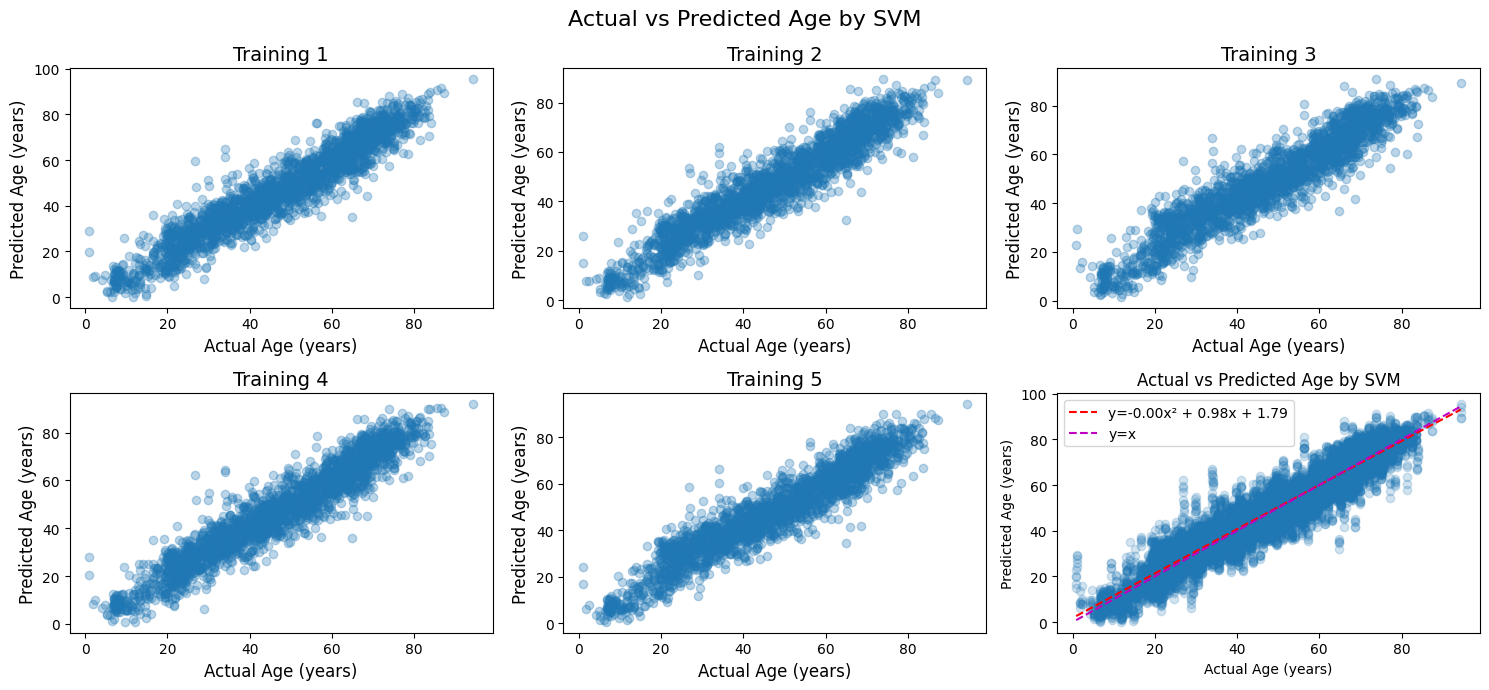

In [33]:
results_svm=pd.read_csv(f'results/train_{data_type}_test_negative_regression_results_svm_valid_True.csv', sep='\t')
plots.age_prediction_function(results_svm, model="SVM", data_type=data_type, valid=True, test='negative')

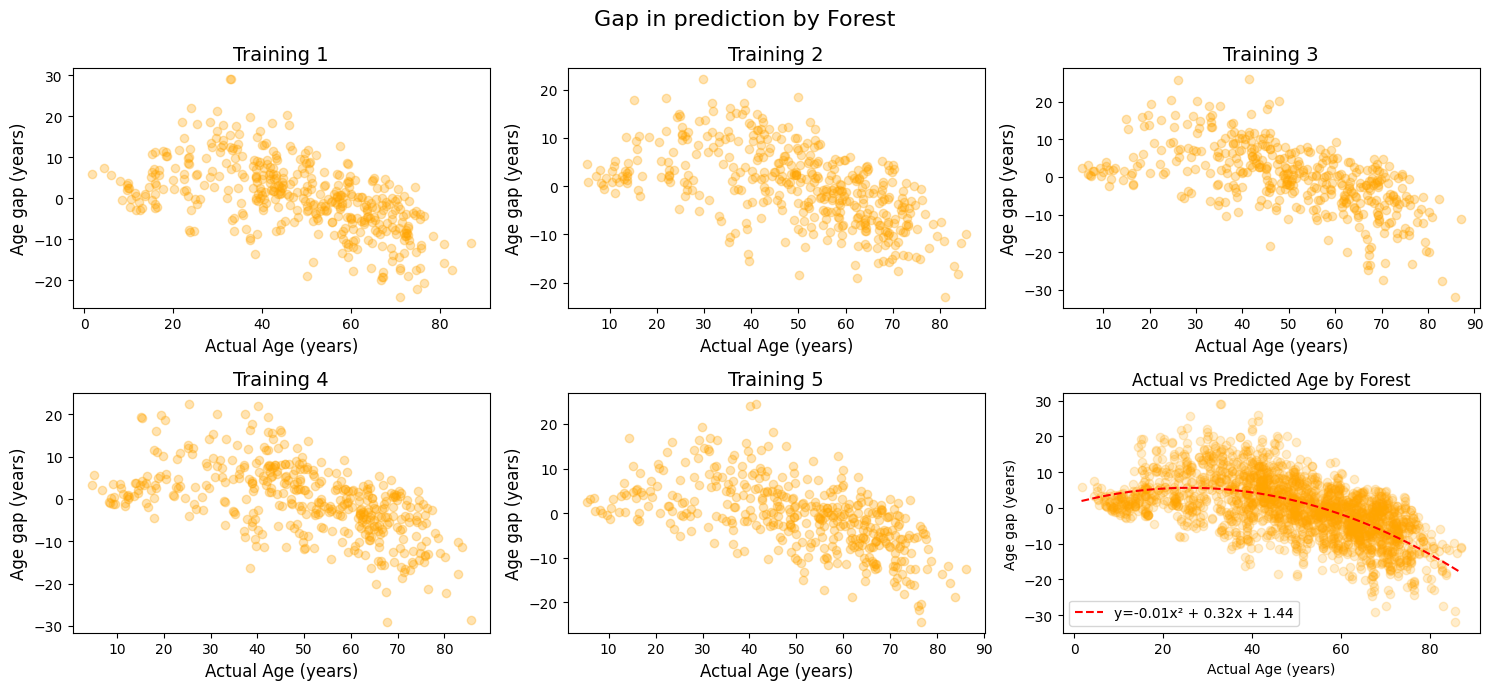

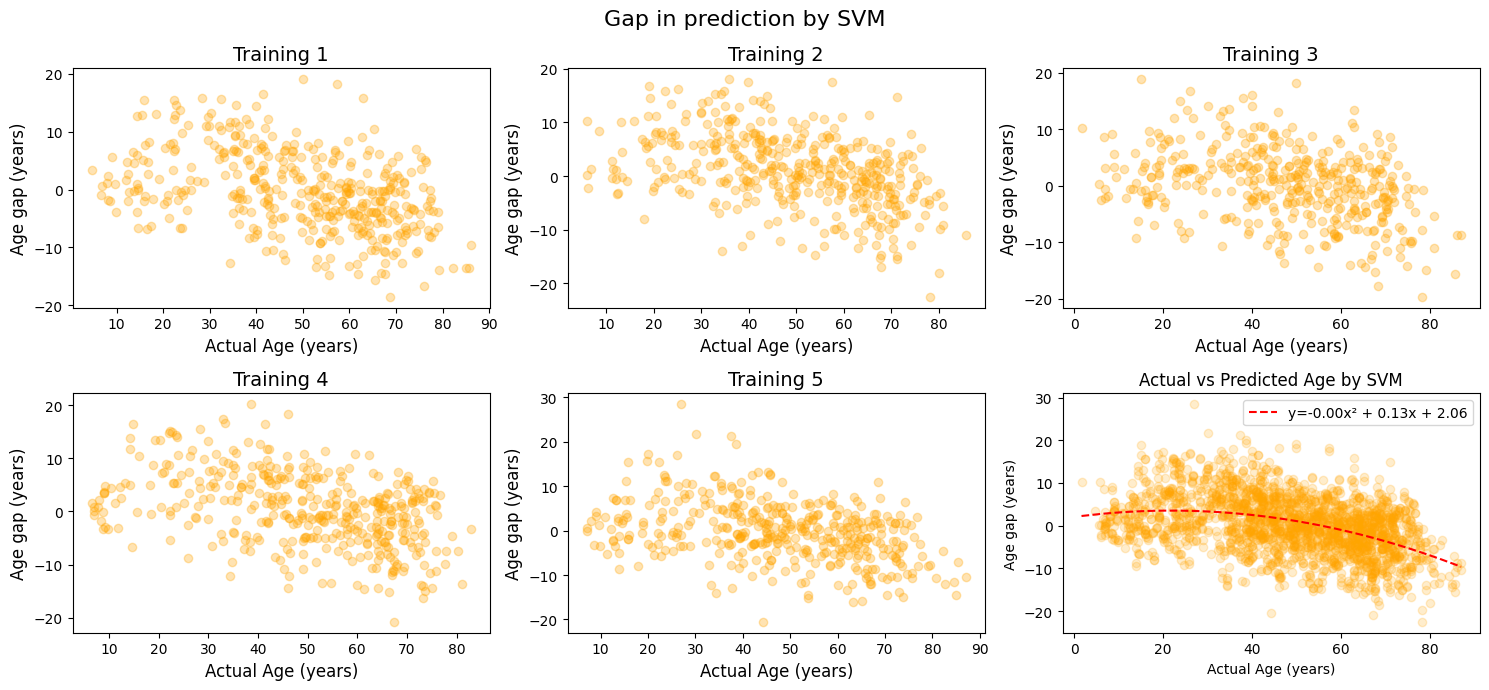

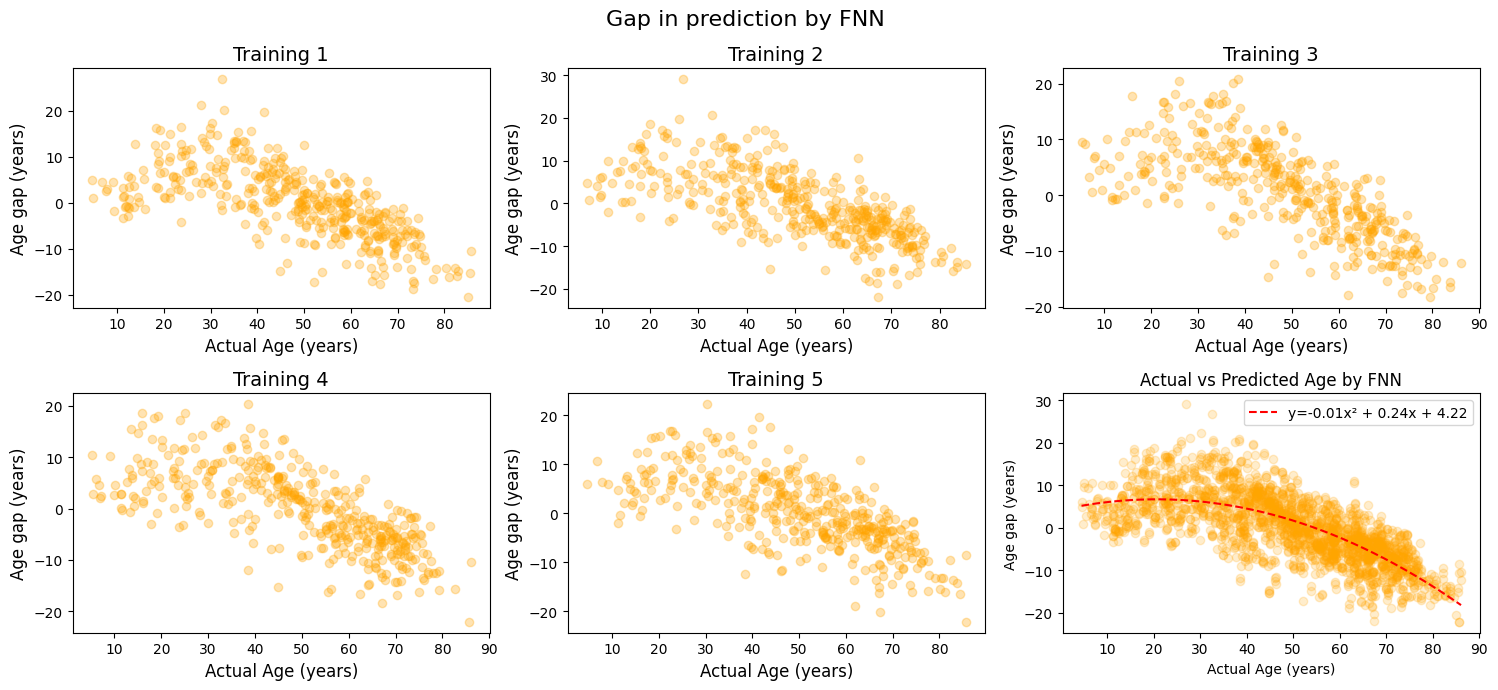

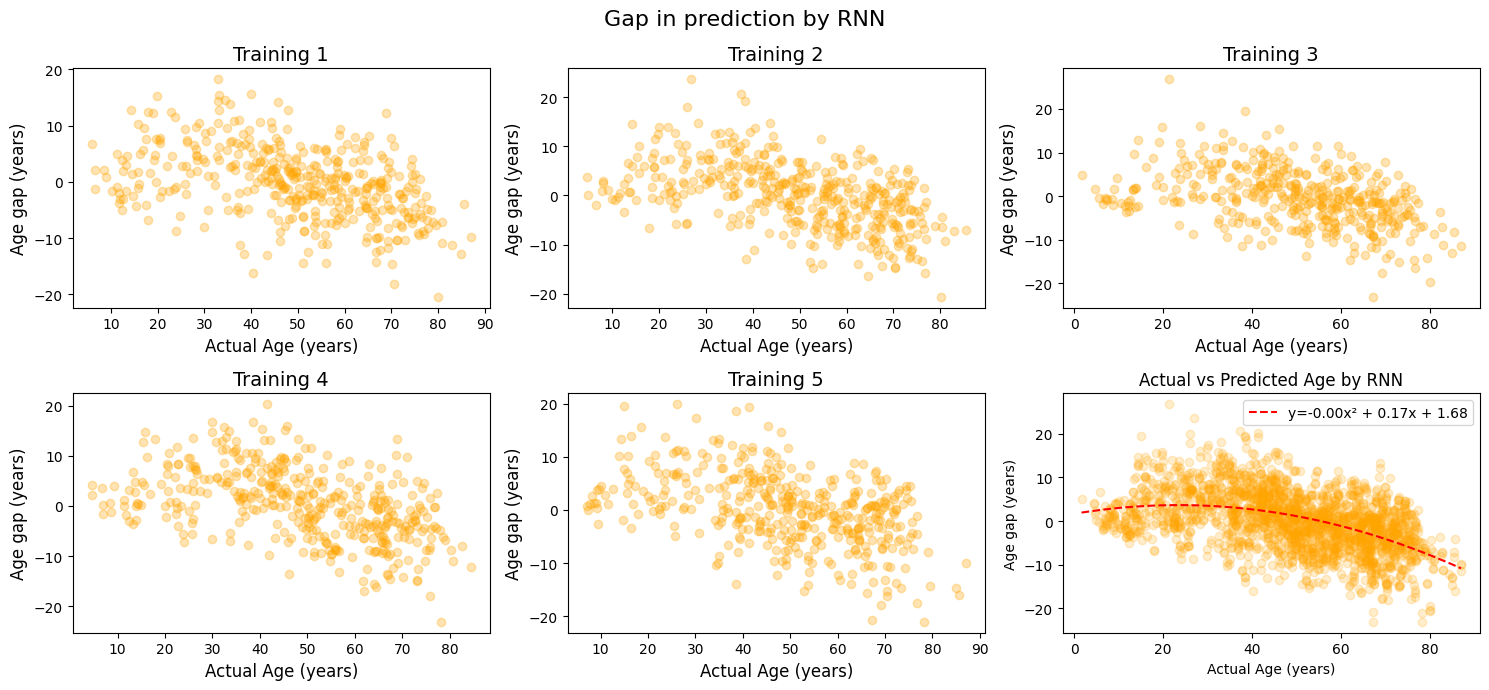

In [39]:
import importlib
importlib.reload(plots)
data_type='positive'

#age prediction results, function alrady saves the results
results_tree=pd.read_csv(f'results/train_{data_type}_test_None_regression_results_forest_valid_0.csv', sep='\t')
plots.age_prediction_gap(results_tree, model="Forest", data_type=data_type)

results_svm=pd.read_csv(f'results/train_{data_type}_test_None_regression_results_svm_valid_0.csv', sep='\t')
plots.age_prediction_gap(results_svm, model="SVM", data_type=data_type)

results_fnn=pd.read_csv(f'results/train_{data_type}_test_None_regression_results_fnn_valid_0.csv', sep='\t')
plots.age_prediction_gap(results_fnn, model="FNN", data_type=data_type)

results_rnn=pd.read_csv(f'results/train_{data_type}_test_None_regression_results_rnn_valid_0.csv', sep='\t')
plots.age_prediction_gap(results_rnn, model="RNN", data_type=data_type)


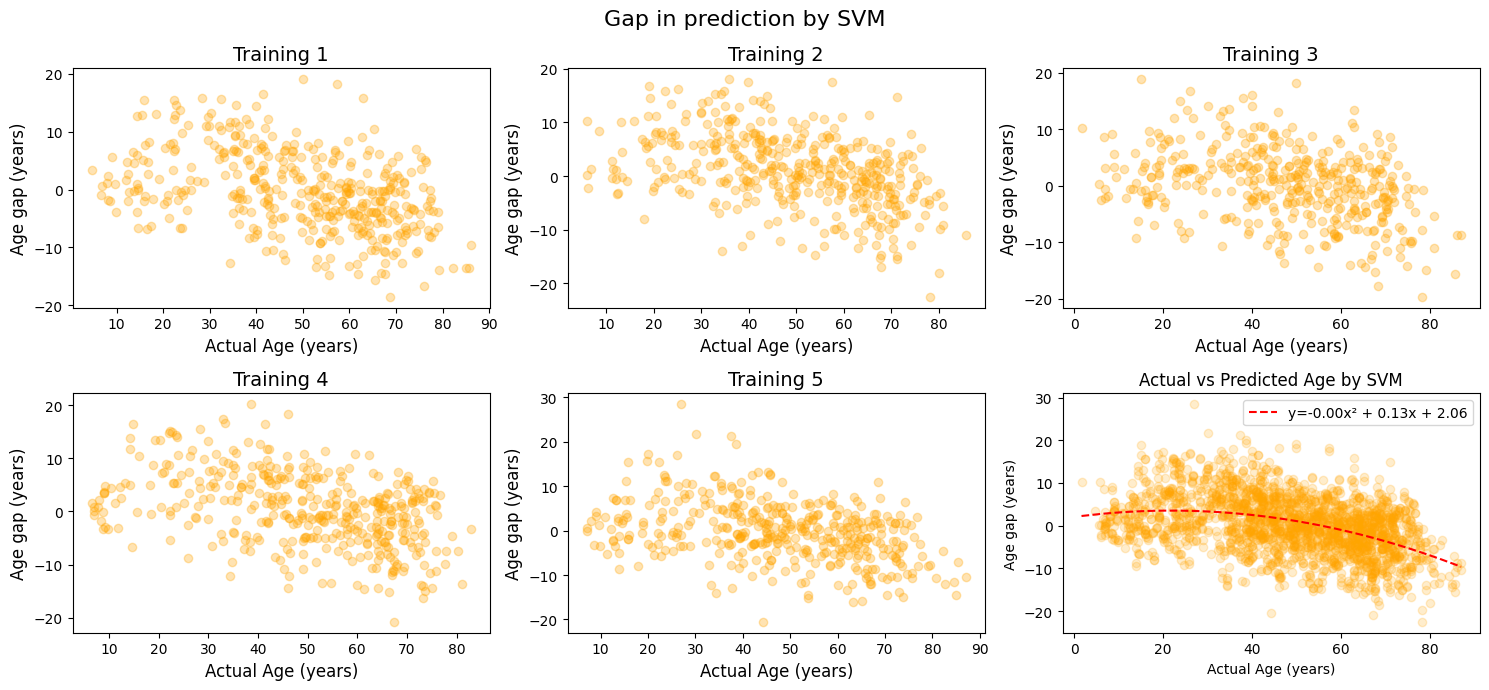

In [40]:
results_svm=pd.read_csv(f'results/train_{data_type}_test_None_regression_results_svm_valid_0.csv', sep='\t')
plots.age_prediction_gap(results_svm, model="SVM", data_type=data_type, valid=True)

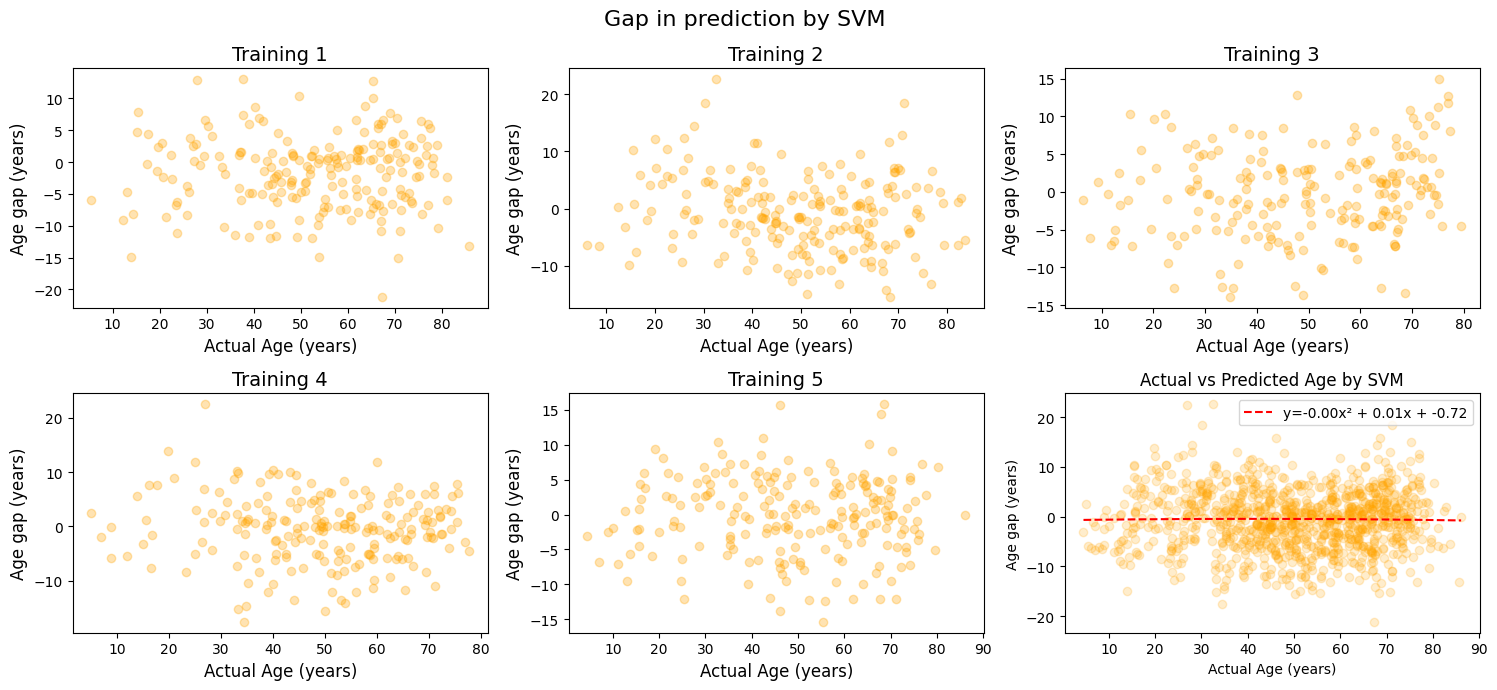

In [35]:
results_svm=pd.read_csv(f'results/train_positive_test_None_regression_results_svm_valid_True.csv', sep='\t')
plots.age_prediction_gap(results_svm, model="SVM", data_type=data_type, valid=True, test='negative')


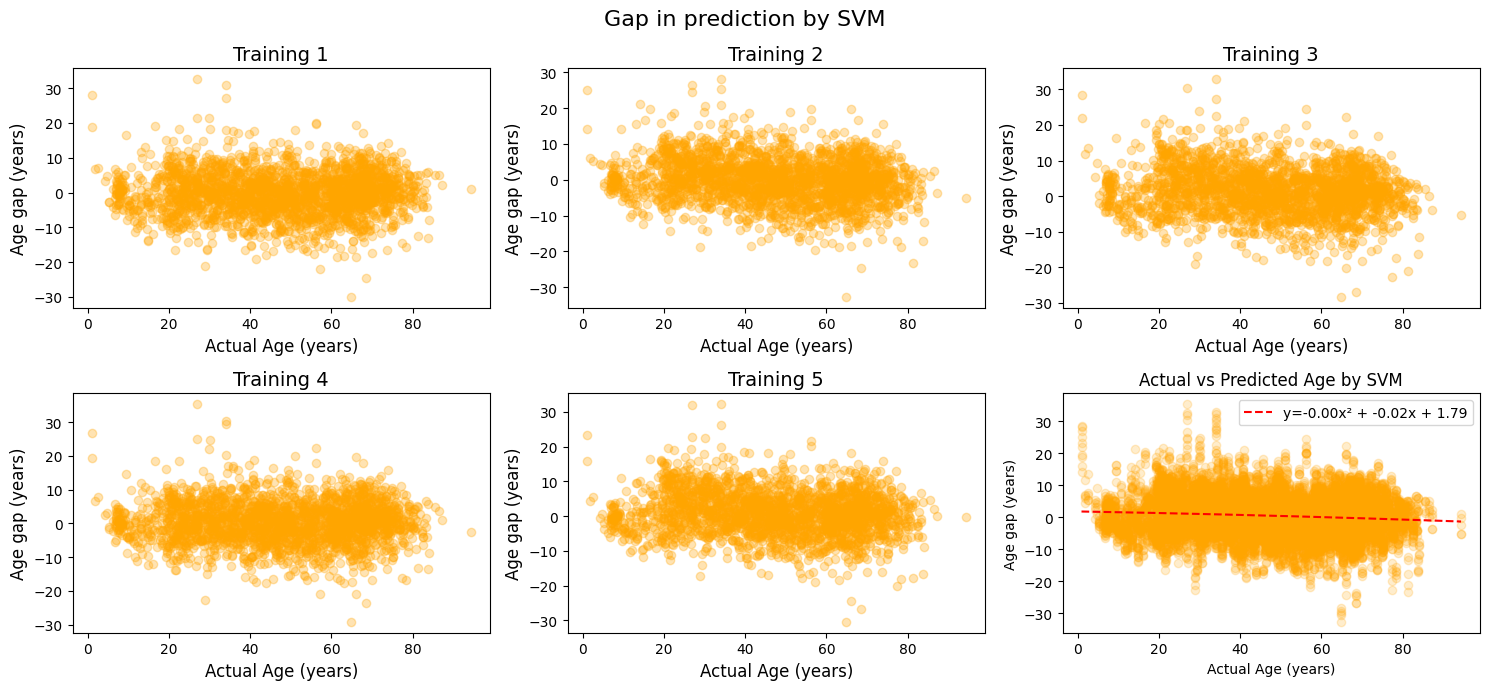

In [36]:
results_svm=pd.read_csv(f'results/train_positive_test_negative_regression_results_svm_valid_True.csv', sep='\t')
plots.age_prediction_gap(results_svm, model="SVM", data_type=data_type)

In [ ]:
#macierze korelacji z Total Intracranial Volume
path=f'data/{data_type}_norm_confirmed_normal/all_concatenated.csv'
folder_out=f'data/{data_type}_correlation_matrices'
#volume_analysis.correlation_matrix_total_volume(path, folder_out)
processor=prepare_dataset.DatasetPreprocessor()

#wyswietlenie korelacji
correlations=pd.read_csv(f'data/{data_type}_correlation_matrices/volume_area_correlation_matrix.csv', sep='\t', index_col=0)
#wykres osobno dla mężczyzn i kobiet
df=processor.transform_correlations_total_volume(correlations)
plots.correlations_total_volume(df)

In [ ]:
folder=f'data/{data_type}_norm_confirmed_normal'
#w konkretnych csv
reductor = dimensions_reduction.DimensionsReductor()
reductor.calculate_correlation_matrices(folder, folder_out)

#połączenie we wszystkie możliwe pary
folder_out='data/pairs'
reductor.pair_files(folder, folder_out)
folder=folder_out
folder_out=f'data/{data_type}_correlation_matrices_pairs'
reductor.calculate_correlation_matrices(folder, folder_out)

path=f'data/{data_type}_norm_confirmed_normal/all_concatenated.csv'
folder_out=f'data/{data_type}_correlation_matrices'
df=pd.read_csv(path, sep='\t')
df=df.dropna(axis=1, how='all')
df=df.drop(columns=['identifier', 'norm_confirmed', 'sex', 'female', 'male', 'age'])
#prepare_dataset.divide_by_total_volume(df)
corr_matrix=df.corr()
corr_matrix.to_csv(f'{folder_out}/all_concatenated_volume_devided_correlation_matrix.csv', sep='\t', index=True)

correlations=pd.read_csv('data/correlation_matrices/all_concatenated_volume_devided_correlation_matrix.csv', sep='\t', index_col=0)
clustered_correlations, selected_features=reductor.cluster_correlations(correlations)
print(selected_features)

In [ ]:
correlations=pd.read_csv(f'data/{data_type}_correlation_matrices/all_concatenated_correlation_matrix.csv', sep='\t', index_col=0)
correlations=correlations.iloc[:50,:50]
plots.correlation_matrix(correlations)
clustered_correlations, selected_featues=dimensions_reduction.cluster_correlations(correlations)
plots.correlation_matrix(clustered_correlations)


importance_df=pd.read_csv('results/importance_sex_nn.csv', sep='\t')
importance_df=pd.read_csv('results/importance_sex_forest.csv', sep='\t')
#plots.component_importance(importance_df, model='Tree')


In [34]:
import os

#print current directory
print(os.getcwd())
#print all files in current directory
print(os.listdir())

/home/marysia/Documents/GitHub/MRI_machine_learning
['plots', 'utils', 'main_age.py', '__pycache__', '.git', 'data', 'main_sex.py', 'main_prepare.py', 'main_delete_unnormal_features.py', '.gitignore', '.venv', 'data_original', 'data (copy)', 'README.md', 'results', 'data_info.ipynb']
